# Clobber

Niniejszy raport przedstawia analizę wydajności algorytmów MinMax i Alpha-Beta oraz porównanie różnych heurystyk w grze Clobber. Zawiera eksperymenty, wizualizacje oraz wnioski dotyczące efektywności poszczególnych podejść.

## Struktura projektu

- Implementacja silnika gry (`game.py`)
- Klasa gracza (`player.py`)
- Heurystyki (`heuristics.py`)
- Algorytmy MinMax i Alpha-Beta (`player.py`)
- Funkcje testujące i porównujące algorytmy oraz heurystyki (`report.ipynb`)

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from game import Clobber, get_other_player
from player import Player
import heuristics

import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

## 1. Wprowadzenie do gry Clobber

Clobber to strategiczna gra planszowa dla dwóch graczy, rozgrywana na planszy o wymiarach n×m. Początkowo plansza jest wypełniona pionkami dwóch kolorów (czarne i białe) w szachownicowym wzorze. Gracze na zmianę wykonują ruchy swoimi pionkami:

- Ruch polega na przesunięciu swojego pionka na sąsiednie pole (w poziomie lub pionie) i zbiciu pionka przeciwnika.
- Gracz, który nie może wykonać ruchu, przegrywa.

W niniejszym projekcie zaimplementowano:
1. Silnik gry Clobber
2. Algorytmy decyzyjne MinMax i Alpha-Beta
3. Różne funkcje heurystyczne do oceny stanów gry

In [2]:
def test_algorithm_performance(board_size, depth, algorithm, heuristic_function, num_moves=10):
    game = Clobber(board_size, board_size)
    
    player_black = Player(game, "B", heuristic_function, depth=depth)
    player_white = Player(game, "W", heuristic_function, depth=depth)
    
    move_times = []
    moves_count = 0
    
    while moves_count < num_moves:
        if algorithm == "minimax":
            if game.player_turn == "B":
                start_time = time.time()
                move = player_black.choose_move_minimax()
                end_time = time.time()
            else:
                start_time = time.time()
                move = player_white.choose_move_minimax()
                end_time = time.time()
        else:
            if game.player_turn == "B":
                start_time = time.time()
                move = player_black.choose_move_alpha_beta()
                end_time = time.time()
            else:
                start_time = time.time()
                move = player_white.choose_move_alpha_beta()
                end_time = time.time()

        move_time = end_time - start_time
        move_times.append(move_time)

        if move is None:
            break

        start_row, start_col, end_row, end_col = move
        game.make_move(start_row, start_col, end_row, end_col, game.player_turn)
        moves_count += 1
        
        if moves_count >= num_moves:
            break
    
    avg_time = sum(move_times) / len(move_times) if move_times else 0
    return {
        "board_size": board_size,
        "depth": depth,
        "algorithm": algorithm,
        "heuristic": heuristic_function.__name__,
        "total_time": sum(move_times),
        "avg_time": avg_time,
        "moves_count": moves_count,
        "move_times": move_times
    }

def play_game(player1_heuristic, player2_heuristic, board_size=5, depth=3, algorithm="alpha-beta"):
    game = Clobber(board_size, board_size)
    
    player_black = Player(game, "B", player1_heuristic, depth=depth)
    player_white = Player(game, "W", player2_heuristic, depth=depth)
    
    moves_count = 0
    
    while True:
        if algorithm == "minimax":
            if game.player_turn == "B":
                move = player_black.choose_move_minimax()
            else:
                move = player_white.choose_move_minimax()
        else:
            if game.player_turn == "B":
                move = player_black.choose_move_alpha_beta()
            else:
                move = player_white.choose_move_alpha_beta()

        if move is None:
            winner = get_other_player(game.player_turn)
            break

        start_row, start_col, end_row, end_col = move
        game.make_move(start_row, start_col, end_row, end_col, game.player_turn)
        moves_count += 1
    
    winner_heuristic = player1_heuristic.__name__ if winner == "B" else player2_heuristic.__name__
    loser_heuristic = player2_heuristic.__name__ if winner == "B" else player1_heuristic.__name__
    
    return {
        "winner": winner,
        "winner_heuristic": winner_heuristic,
        "loser_heuristic": loser_heuristic,
        "moves": moves_count,
        "board_size": board_size,
        "depth": depth
    }

## 2. Porównanie algorytmów MinMax i Alpha-Beta

Wykonamy teraz porównanie wydajności algorytmów MinMax i Alpha-Beta dla różnych rozmiarów planszy i głębokości przeszukiwania. Dla każdej kombinacji parametrów zmierzymy średni czas wykonania ruchu.

In [3]:
board_sizes = [3, 4, 5, 6]
depths = [2, 3, 4]
algorithms = ["minimax", "alpha-beta"]

heuristic_function = heuristics.piece_count_difference_heuristic

results = []

moves_per_test = {3: 10, 4: 8, 5: 6, 6: 4}

for board_size in board_sizes:
    for depth in depths:
        for algorithm in algorithms:
            print(f"Testowanie: {algorithm}, plansza {board_size}x{board_size}, głębokość {depth}")
            num_moves = moves_per_test[board_size]
            result = test_algorithm_performance(
                board_size, depth, algorithm, heuristic_function, num_moves=num_moves
            )
            results.append(result)

df_results = pd.DataFrame(results)
df_results

Testowanie: minimax, plansza 3x3, głębokość 2
Testowanie: alpha-beta, plansza 3x3, głębokość 2
Testowanie: minimax, plansza 3x3, głębokość 3
Testowanie: alpha-beta, plansza 3x3, głębokość 3
Testowanie: minimax, plansza 3x3, głębokość 4
Testowanie: alpha-beta, plansza 3x3, głębokość 4
Testowanie: minimax, plansza 4x4, głębokość 2
Testowanie: alpha-beta, plansza 4x4, głębokość 2
Testowanie: minimax, plansza 4x4, głębokość 3
Testowanie: alpha-beta, plansza 4x4, głębokość 3
Testowanie: minimax, plansza 4x4, głębokość 4
Testowanie: alpha-beta, plansza 4x4, głębokość 4
Testowanie: minimax, plansza 5x5, głębokość 2
Testowanie: alpha-beta, plansza 5x5, głębokość 2
Testowanie: minimax, plansza 5x5, głębokość 3
Testowanie: alpha-beta, plansza 5x5, głębokość 3
Testowanie: minimax, plansza 5x5, głębokość 4
Testowanie: alpha-beta, plansza 5x5, głębokość 4
Testowanie: minimax, plansza 6x6, głębokość 2
Testowanie: alpha-beta, plansza 6x6, głębokość 2
Testowanie: minimax, plansza 6x6, głębokość 3
Test

,board_size,depth,algorithm,heuristic,total_time,avg_time,moves_count,move_times
0,3,2,minimax,piece_count_difference_heuristic,0.000859,0.000143,5,"[0.0004088878631591797, 0.00021696090698242188..."
1,3,2,alpha-beta,piece_count_difference_heuristic,0.000562,0.000094,5,"[0.00021910667419433594, 0.0001559257507324218..."
2,3,3,minimax,piece_count_difference_heuristic,0.003524,0.000881,3,"[0.0023038387298583984, 0.0006809234619140625,..."
3,3,3,alpha-beta,piece_count_difference_heuristic,0.001374,0.000344,3,"[0.0005738735198974609, 0.0004620552062988281,..."
4,3,4,minimax,piece_count_difference_heuristic,0.009849,0.002462,3,"[0.00710606575012207, 0.0019199848175048828, 0..."
5,3,4,alpha-beta,piece_count_difference_heuristic,0.002208,0.000552,3,"[0.0011878013610839844, 0.0005702972412109375,..."
6,4,2,minimax,piece_count_difference_heuristic,0.007582,0.000948,8,"[0.0025801658630371094, 0.0013079643249511719,..."
7,4,2,alpha-beta,piece_count_difference_heuristic,0.003346,0.000418,8,"[0.000843048095703125, 0.0005869865417480469, ..."
8,4,3,minimax,piece_count_difference_heuristic,0.076375,0.009547,8,"[0.029470205307006836, 0.015915870666503906, 0..."
9,4,3,alpha-beta,piece_count_difference_heuristic,0.010069,0.001259,8,"[0.002574920654296875, 0.0019960403442382812, ..."


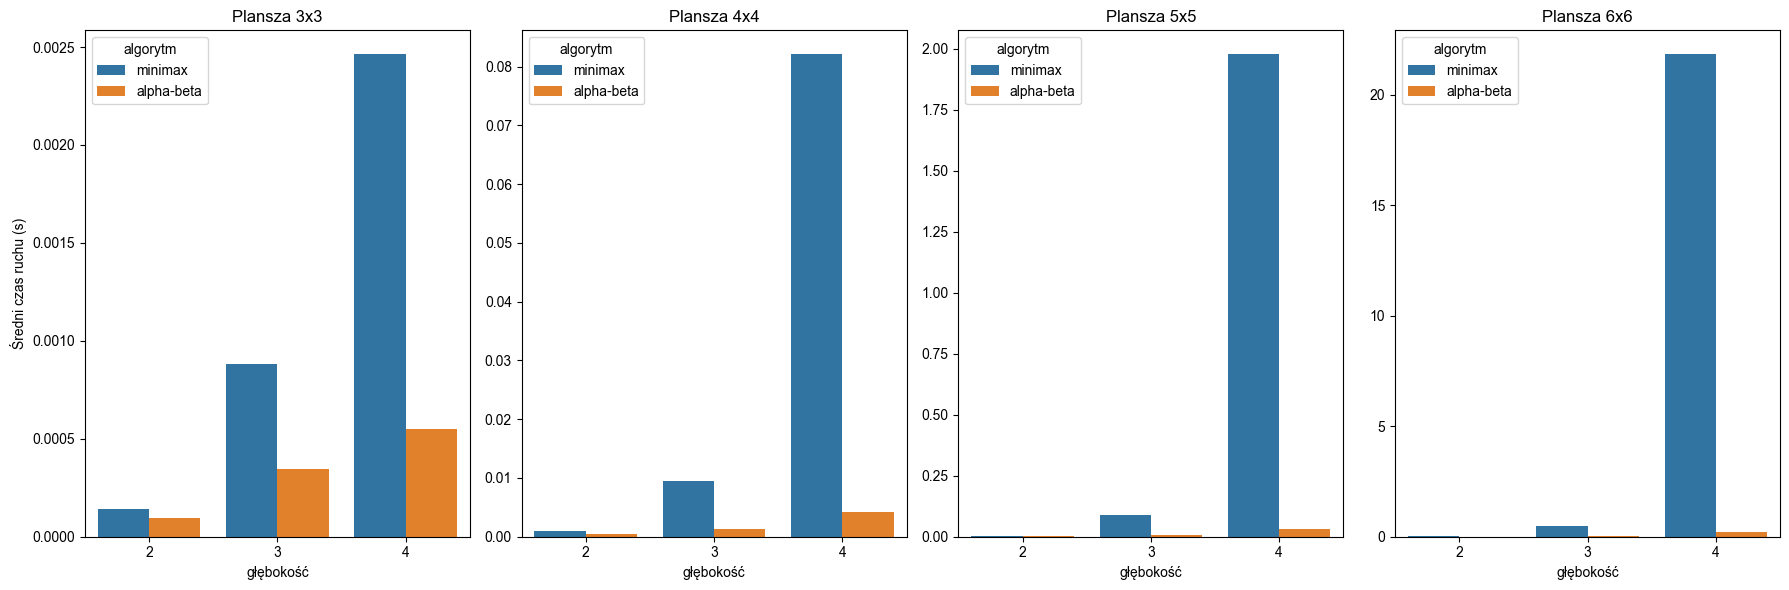

In [4]:
fig, axes = plt.subplots(1, len(board_sizes), figsize=(18, 6))

for i, board_size in enumerate(board_sizes):
    df_board = df_results[df_results['board_size'] == board_size]
    
    data = []
    for depth in depths:
        for algorithm in algorithms:
            row = df_board[(df_board['depth'] == depth) & (df_board['algorithm'] == algorithm)]
            if not row.empty:
                data.append({
                    'głębokość': depth, 
                    'algorytm': algorithm, 
                    'średni czas (s)': row.iloc[0]['avg_time']
                })
    
    df_plot = pd.DataFrame(data)
    
    sns.barplot(x='głębokość', y='średni czas (s)', hue='algorytm', data=df_plot, ax=axes[i])
    axes[i].set_title(f'Plansza {board_size}x{board_size}')
    axes[i].set_ylabel('Średni czas ruchu (s)' if i == 0 else '')

plt.tight_layout()
plt.show()

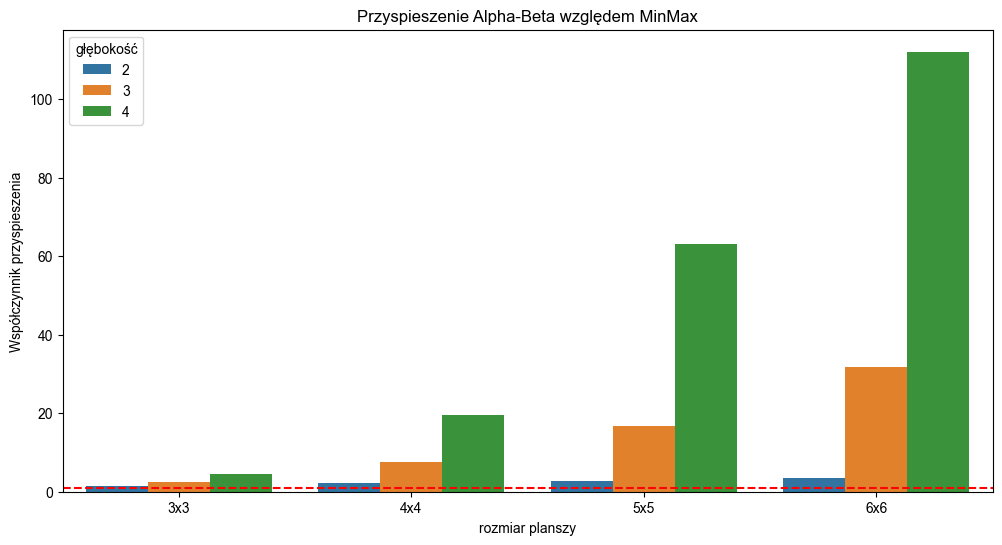

In [5]:
speedup_data = []

for board_size in board_sizes:
    for depth in depths:
        minimax_time = df_results[(df_results['board_size'] == board_size) & 
                               (df_results['depth'] == depth) & 
                               (df_results['algorithm'] == 'minimax')]['avg_time'].values[0]
        alphabeta_time = df_results[(df_results['board_size'] == board_size) & 
                                 (df_results['depth'] == depth) & 
                                 (df_results['algorithm'] == 'alpha-beta')]['avg_time'].values[0]
        
        speedup = minimax_time / alphabeta_time if alphabeta_time > 0 else 0
        
        speedup_data.append({
            'rozmiar planszy': f'{board_size}x{board_size}',
            'głębokość': depth,
            'przyspieszenie': speedup
        })

df_speedup = pd.DataFrame(speedup_data)

plt.figure(figsize=(12, 6))
sns.barplot(x='rozmiar planszy', y='przyspieszenie', hue='głębokość', data=df_speedup)
plt.title('Przyspieszenie Alpha-Beta względem MinMax')
plt.ylabel('Współczynnik przyspieszenia')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

## 3. Wpływ głębokości przeszukiwania na czas wykonania

Zbadajmy teraz, jak głębokość przeszukiwania wpływa na czas wykonania algorytmu Alpha-Beta dla różnych rozmiarów planszy.

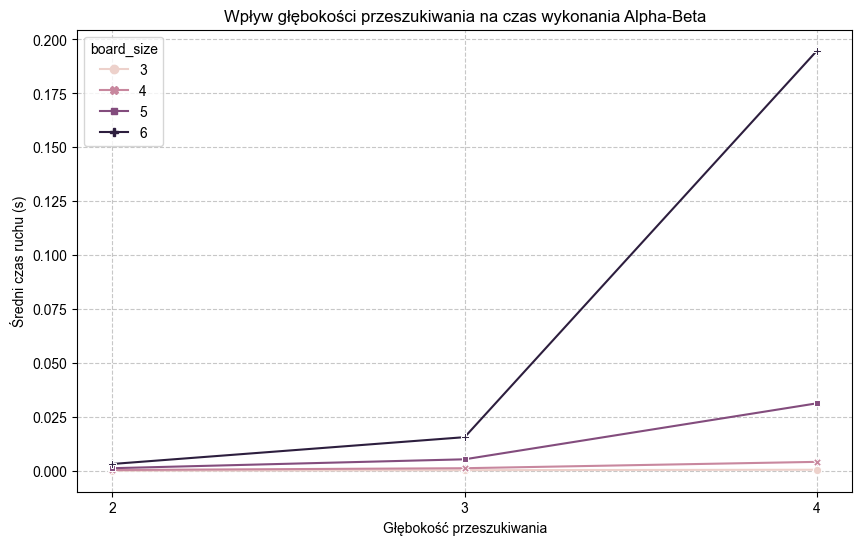

In [6]:
df_alpha_beta = df_results[df_results['algorithm'] == 'alpha-beta']

plt.figure(figsize=(10, 6))
sns.lineplot(x='depth', y='avg_time', hue='board_size', style='board_size', 
             markers=True, dashes=False, data=df_alpha_beta)
plt.title('Wpływ głębokości przeszukiwania na czas wykonania Alpha-Beta')
plt.xlabel('Głębokość przeszukiwania')
plt.ylabel('Średni czas ruchu (s)')
plt.xticks(depths)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 4. Porównanie różnych heurystyk

W tej sekcji porównamy skuteczność różnych heurystyk w grze Clobber. Dla każdej pary heurystyk rozegramy serię gier i zbadamy, która heurystyka jest skuteczniejsza.

In [7]:
available_heuristics = [
    heuristics.piece_count_difference_heuristic,
    heuristics.mobility_heuristic,
    heuristics.center_control_heuristic,
    heuristics.grouping_heuristic,
    heuristics.random_heuristic,
    heuristics.adaptive_heuristic
]

depth = 3
algorithm = "alpha-beta"

heuristic_game_results = []

for h1 in available_heuristics:
    for h2 in available_heuristics:
        if h1 != h2:
            for idx, board_size in enumerate(board_sizes):
                print(f"Gra {idx+1}: {h1.__name__} vs {h2.__name__} na planszy {board_size}x{board_size}")
                result = play_game(h1, h2, board_size=board_size, depth=depth, algorithm=algorithm)
                heuristic_game_results.append(result)

df_heuristic_games = pd.DataFrame(heuristic_game_results)
df_heuristic_games


Gra 1: piece_count_difference_heuristic vs mobility_heuristic na planszy 3x3
Gra 2: piece_count_difference_heuristic vs mobility_heuristic na planszy 4x4
Gra 3: piece_count_difference_heuristic vs mobility_heuristic na planszy 5x5
Gra 4: piece_count_difference_heuristic vs mobility_heuristic na planszy 6x6
Gra 1: piece_count_difference_heuristic vs center_control_heuristic na planszy 3x3
Gra 2: piece_count_difference_heuristic vs center_control_heuristic na planszy 4x4
Gra 3: piece_count_difference_heuristic vs center_control_heuristic na planszy 5x5
Gra 4: piece_count_difference_heuristic vs center_control_heuristic na planszy 6x6
Gra 1: piece_count_difference_heuristic vs grouping_heuristic na planszy 3x3
Gra 2: piece_count_difference_heuristic vs grouping_heuristic na planszy 4x4
Gra 3: piece_count_difference_heuristic vs grouping_heuristic na planszy 5x5
Gra 4: piece_count_difference_heuristic vs grouping_heuristic na planszy 6x6
Gra 1: piece_count_difference_heuristic vs random_he

,winner,winner_heuristic,loser_heuristic,moves,board_size,depth
0,B,piece_count_difference_heuristic,mobility_heuristic,3,3,3
1,W,mobility_heuristic,piece_count_difference_heuristic,6,4,3
2,W,mobility_heuristic,piece_count_difference_heuristic,10,5,3
3,W,mobility_heuristic,piece_count_difference_heuristic,18,6,3
4,B,piece_count_difference_heuristic,center_control_heuristic,3,3,3
...,...,...,...,...,...,...
115,W,grouping_heuristic,adaptive_heuristic,24,6,3
116,B,adaptive_heuristic,random_heuristic,3,3,3
117,B,adaptive_heuristic,random_heuristic,9,4,3
118,B,adaptive_heuristic,random_heuristic,13,5,3


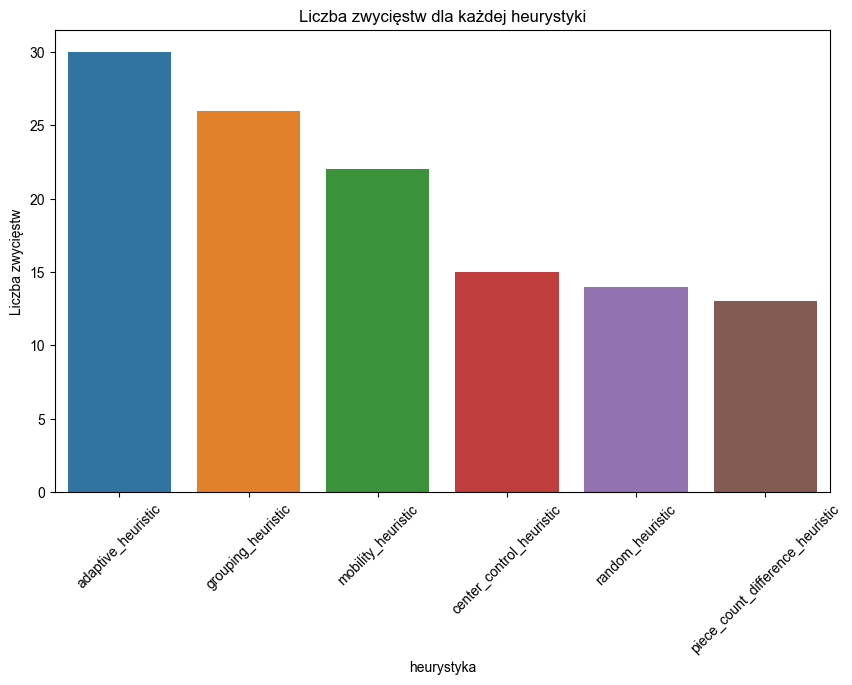

In [8]:
win_counts = {}
for heuristic in [h.__name__ for h in available_heuristics]:
    win_counts[heuristic] = len(df_heuristic_games[df_heuristic_games['winner_heuristic'] == heuristic])

df_wins = pd.DataFrame(list(win_counts.items()), columns=['heurystyka', 'liczba zwycięstw'])
df_wins = df_wins.sort_values('liczba zwycięstw', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='heurystyka', y='liczba zwycięstw', data=df_wins)
plt.title('Liczba zwycięstw dla każdej heurystyki')
plt.ylabel('Liczba zwycięstw')
plt.xticks(rotation=45)
plt.show()

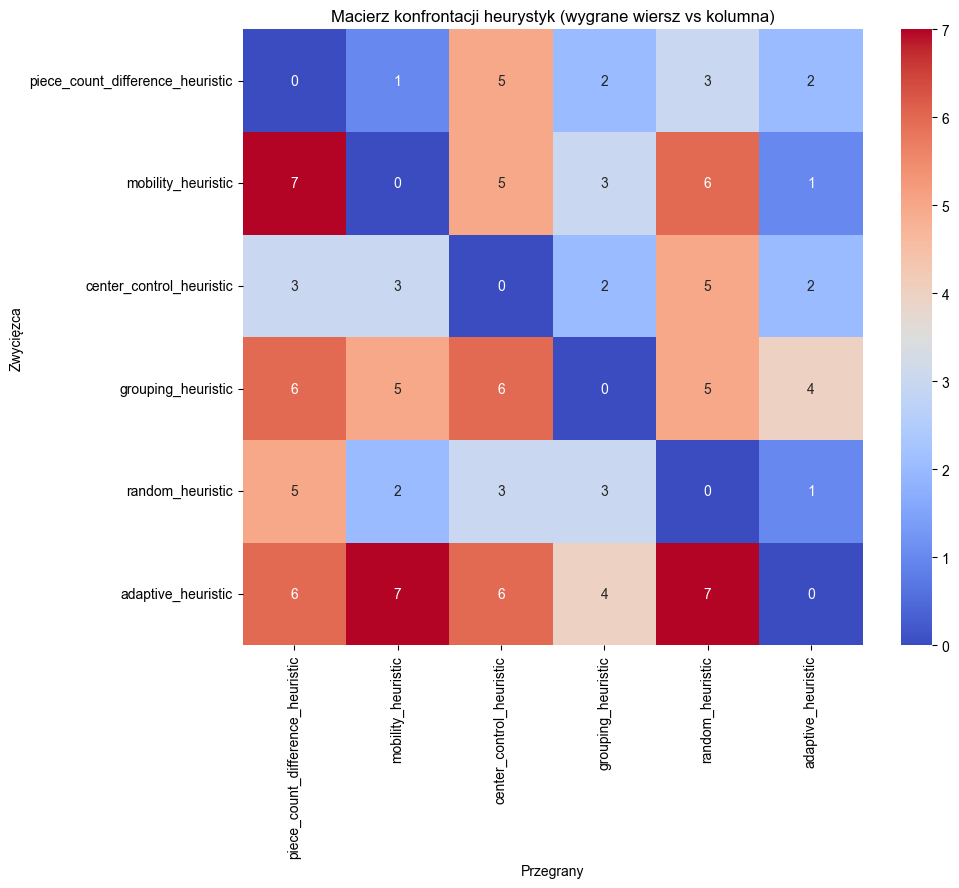

In [9]:
heuristic_names = [h.__name__ for h in available_heuristics]
heuristic_matrix = pd.DataFrame(0, index=heuristic_names, columns=heuristic_names)

for _, row in df_heuristic_games.iterrows():
    winner = row['winner_heuristic']
    loser = row['loser_heuristic']
    if winner in heuristic_names and loser in heuristic_names:
        heuristic_matrix.loc[winner, loser] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(heuristic_matrix, annot=True, cmap="coolwarm", fmt="d")
plt.title('Macierz konfrontacji heurystyk (wygrane wiersz vs kolumna)')
plt.ylabel('Zwycięzca')
plt.xlabel('Przegrany')
plt.show()

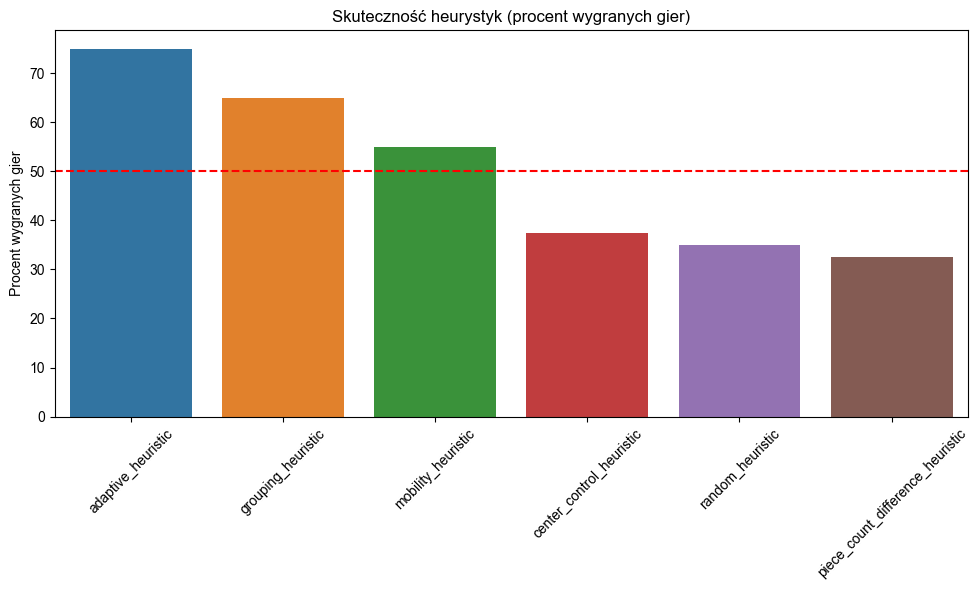

In [10]:
effectiveness = {}
for h in heuristic_names:
    wins = len(df_heuristic_games[df_heuristic_games['winner_heuristic'] == h])
    losses = len(df_heuristic_games[df_heuristic_games['loser_heuristic'] == h])
    total = wins + losses
    if total > 0:
        win_percentage = (wins / total) * 100
    else:
        win_percentage = 0
    effectiveness[h] = win_percentage

effectiveness = dict(sorted(effectiveness.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(effectiveness.keys()), y=list(effectiveness.values()))
plt.title('Skuteczność heurystyk (procent wygranych gier)')
plt.ylabel('Procent wygranych gier')
plt.xticks(rotation=45)
plt.axhline(y=50, color='r', linestyle='--')
plt.tight_layout()
plt.show()

## 5. Najważniejsze problemy implementacyjne

Podczas realizacji projektu napotkano kilka istotnych wyzwań implementacyjnych:

- **Generowanie ruchów**: Efektywne generowanie wszystkich możliwych ruchów dla danego gracza, z uwzględnieniem zasad gry Clobber.
- **Projektowanie heurystyk**: Stworzenie funkcji oceny stanu gry, które są zarówno szybkie, jak i skuteczne w przewidywaniu korzystnych pozycji.
- **Optymalizacja wydajności**: Minimalizacja czasu obliczeń, szczególnie dla większych plansz i głębokości, poprzez optymalizację kodu i unikanie zbędnych obliczeń (na przykład kopiowania stanu gry).

## 6. Wnioski i podsumowanie

### Porównanie algorytmów MinMax i Alpha-Beta

- Algorytm Alpha-Beta wykazuje znaczące przyspieszenie w porównaniu do standardowego MinMax, szczególnie dla większych głębokości przeszukiwania i większych rozmiarów planszy.
- Przyspieszenie rośnie wykładniczo wraz ze wzrostem głębokości, co jest zgodne z teorią algorytmu Alpha-Beta.
- Dla małych plansz i małych głębokości różnica może być mniej zauważalna, ale staje się krytyczna dla bardziej złożonych przypadków.

### Wpływ głębokości przeszukiwania

- Czas wykonania rośnie wykładniczo wraz ze wzrostem głębokości przeszukiwania.
- Dla większych plansz przyrost czasu jest jeszcze bardziej drastyczny.
- Kompromis między czasem a jakością decyzji jest kluczowym aspektem w projektowaniu AI dla gier.

### Porównanie heurystyk

- Różne heurystyki wykazują różną skuteczność w grze Clobber.
- Wybór odpowiedniej heurystyki może mieć znaczący wpływ na wynik gry.
- Zdecydowanie najgorsze wyniki daje heurystyka dotycząca kontroli centrum, a najlepsze heurystyka dotycząca grupowania i adaptacyjna.
- Heurystyka losowa okazuje się być zaskakująco mocna.

### Rekomendacje

- Dla praktycznych zastosowań zdecydowanie zaleca się korzystanie z algorytmu Alpha-Beta zamiast standardowego MinMax.
- Dla większych plansz należy ograniczyć głębokość przeszukiwania, aby utrzymać rozsądny czas obliczeniowy.
- Warto eksperymentować z różnymi heurystykami, a nawet rozważyć połączenie kilku heurystyk dla uzyskania lepszych wyników.

## Źródła

- https://en.wikipedia.org/wiki/Clobber
- https://www.researchgate.net/publication/221932254_New_Trends_in_Clobber_Programming